# Bi-variate analysis of Walmart TripType classification dataset

In [2]:
from __future__ import division
#import required modules
import pandas as pd 
from IPython.display import display
import numpy as np
#matplotlib for additional coustomization
from matplotlib import pyplot as plt
%matplotlib inline

#seaborn for plotting and styling
import seaborn as sns

## Read the dataset

In [3]:
data = pd.read_csv('data/train.csv')
data.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


## Analysis of Weekday, VIsitNumber with TripType

In [4]:
#seperate the variables from the dataset first
tripsbyday = data[['TripType','VisitNumber', 'Weekday']]
tripsbyday.head()

,TripType,VisitNumber,Weekday
0,999,5,Friday
1,30,7,Friday
2,30,7,Friday
3,26,8,Friday
4,26,8,Friday


We know that VisitNumber and Weekday are two values which will remain same for one basket, where other variables may change. Except TripType ofcourse. So if you want to check frequency of a trip on any day of the week, we must first check unique visits and trips on any certain day. Because if we don't, then we will be counting transactions in the trip on any certain day.<br>
Lets compare both intuitions below.

In [11]:
#finding unique no of trips fo days in week
byvisit = data.pivot_table(values='VisitNumber', index='TripType', columns='Weekday',\
                     aggfunc=lambda x: len(x.unique()), fill_value=0)
byvisit

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
TripType,,,,,,,
3,794,437,622,451,402,457,480
4,62,51,62,46,40,40,45
5,751,584,742,579,638,628,671
6,226,138,303,184,136,128,162
7,877,799,843,900,746,780,807
8,1944,1575,1984,1989,1525,1598,1546
9,1565,1067,1765,1701,1158,1040,1168
12,36,22,81,74,17,21,18
14,1,1,2,0,0,0,0


Above matrix/dataframe shows frequency of trip on any day. i.e on Friday <b>794</b> type <b>3</b> trips occoured.

In [12]:
#range count between 1(max) and zero(min) to plot heatmap better
byvisit = byvisit.div(byvisit.max(axis=1), axis=0)

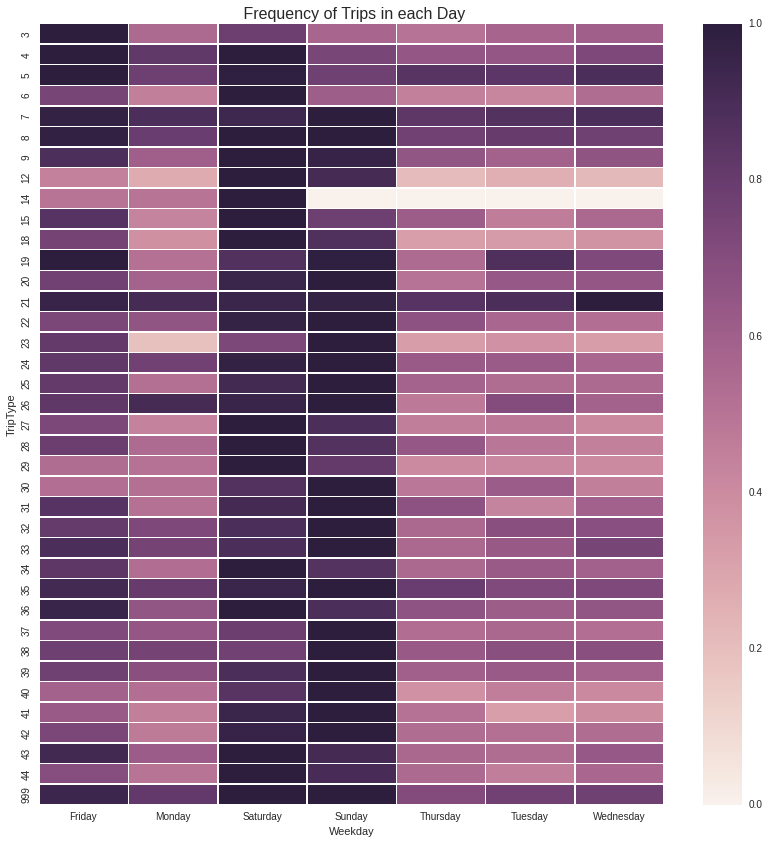

In [15]:
plt.figure(figsize=(14,14))
sns.heatmap(byvisit, linewidth=0.1)
plt.title(' Frequency of Trips in each Day', fontsize=16)

Abovegraph shows the frequency of a triptype in any day of the week, for ex in above graph triptype 3 has occoured most on friday.

## DepartmentDescription and TripType

### For products purchased

In [50]:
#Dapartments frequency in different TripTypes for products purchased
purchased = data[data.ScanCount > -1]
dept_bytrips = purchased[['TripType', 'DepartmentDescription']]
dept_bytrips.head()

,TripType,DepartmentDescription
1,30,SHOES
2,30,PERSONAL CARE
3,26,PAINT AND ACCESSORIES
4,26,PAINT AND ACCESSORIES
5,26,PAINT AND ACCESSORIES


In [51]:
dept_bytrips = pd.crosstab(dept_bytrips['DepartmentDescription'], dept_bytrips['TripType'])
#below dataframe/matrix shows the frequency of depts. in different trip types
#dept_bytrips

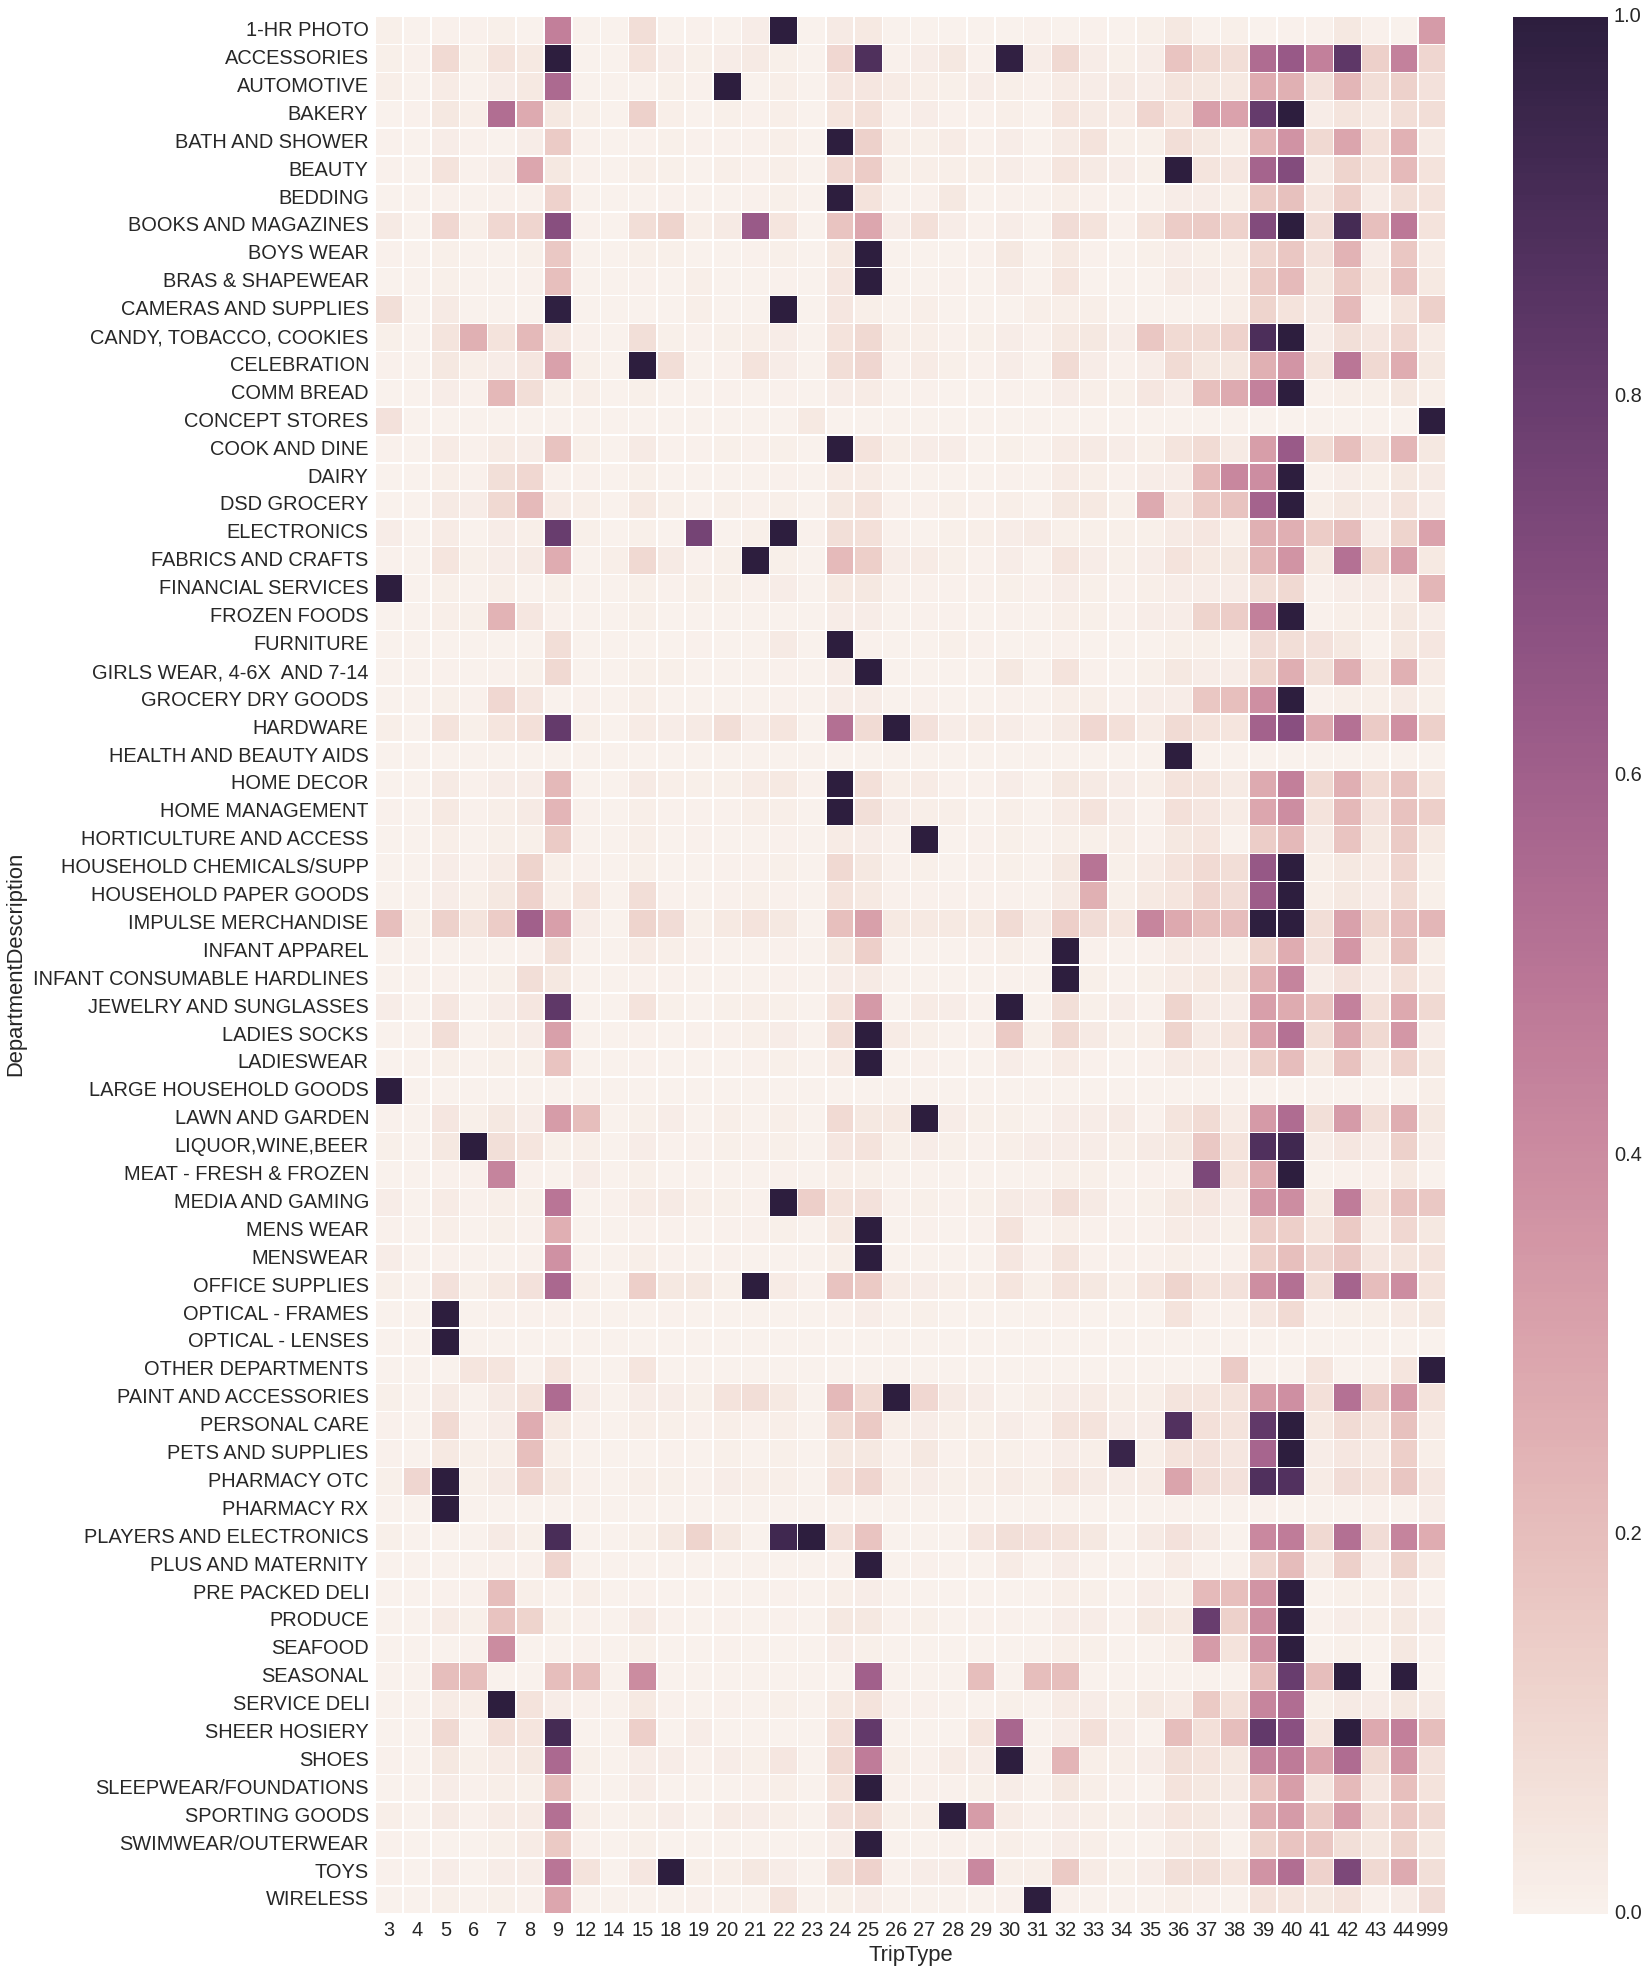

In [52]:
dept_div = dept_bytrips.div(dept_bytrips.max(axis=1), axis=0)
plt.figure(figsize=(24,34))
sns.set(font_scale=2)
sns.heatmap(dept_div, linewidth=0.2)

Above Graph Shows frequency of departments across diferent trip types for products purchased(positive ScanCounts), we can see that there are some depts which are more frequent than others in some trips, and some trips include products from many different depts. in more quantity.<br>
For ex we can say taht triptype 3 can be classified when products from <b>Financial Services</b> and <b>Large HouseHold Goods</b> are more frequent in bucket than other dept. products.
<br>
<br>
todo: To check if our intuition is true we must see how many times it has happend that "Financial services" and "house hold goods" are more frequent in trip type 3 out of total.

### For products returned

In [30]:
#check depts/ triptypes frequency when product was returned
returned = data[data.ScanCount < 0]
dept_bytrips = returned[['TripType', 'DepartmentDescription']]
dept_bytrips.head()

,TripType,DepartmentDescription
0,999,FINANCIAL SERVICES
9,26,PAINT AND ACCESSORIES
14,26,PAINT AND ACCESSORIES
297,9,CELEBRATION
299,9,CELEBRATION


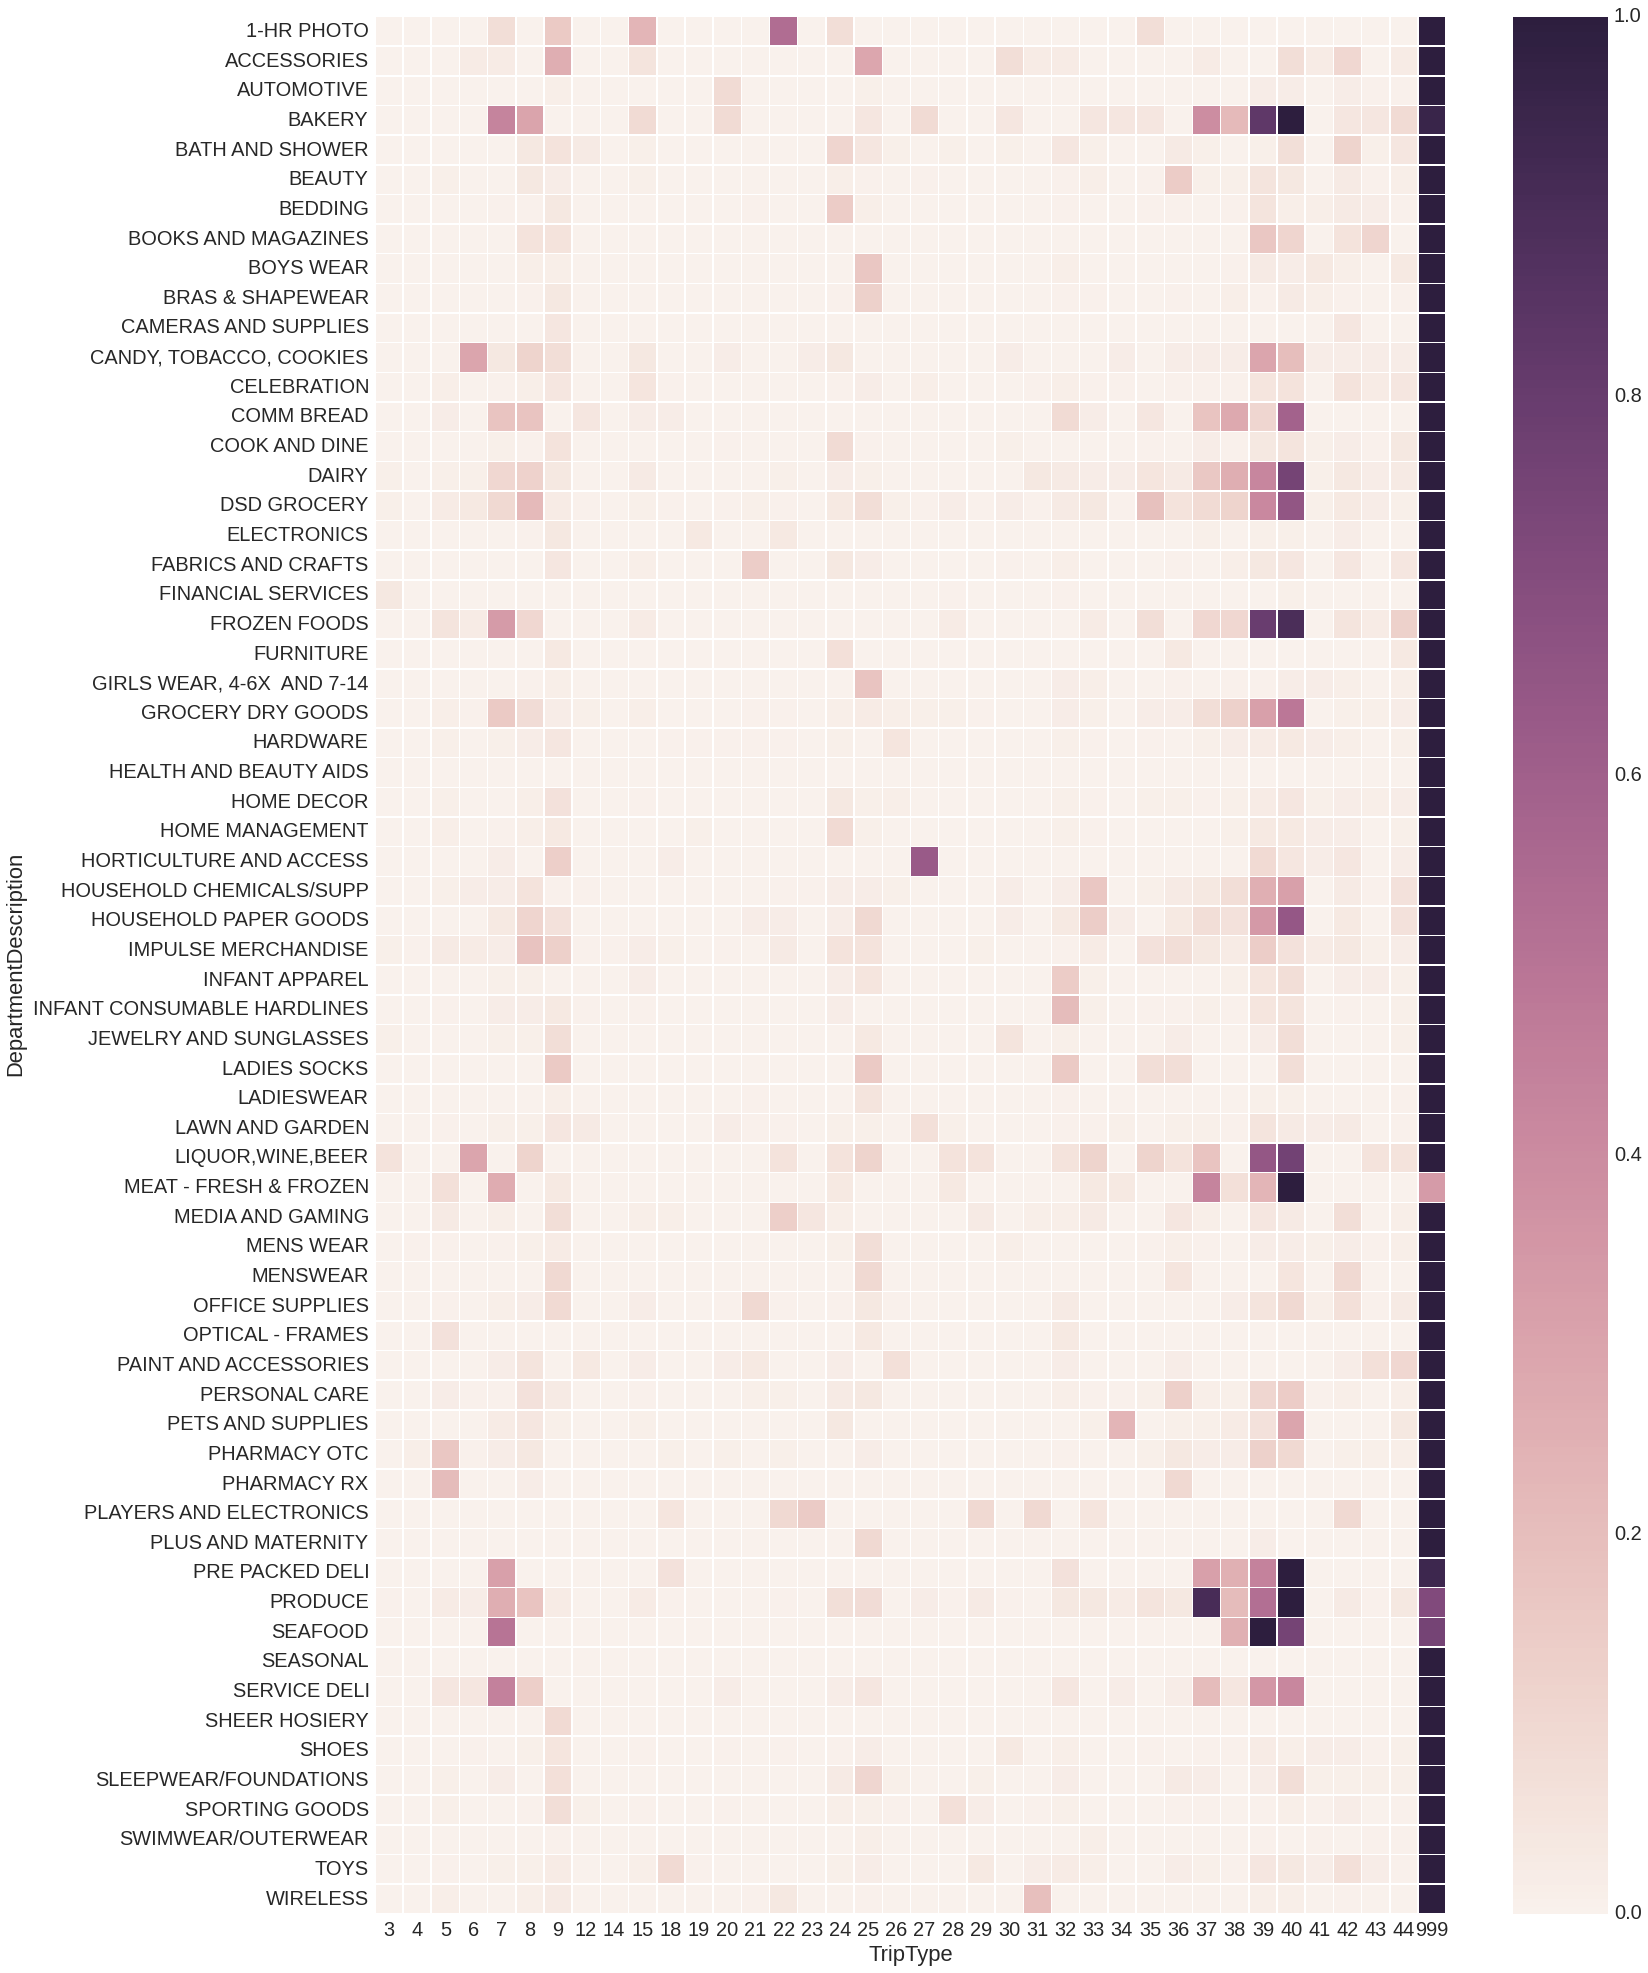

In [31]:
dept_bytrips = pd.crosstab(dept_bytrips['DepartmentDescription'], dept_bytrips['TripType'])
dept_div = dept_bytrips.div(dept_bytrips.max(axis=1), axis=0)
plt.figure(figsize=(24,34))
sns.set(font_scale=2)
sns.heatmap(dept_div, linewidth=0.2)

From above graph we can conclude that most of the time when product was returned, it was categorized ass 999(other) triptype.

## ScanCount with TripType

In [32]:
scancount = data[['TripType', 'ScanCount']]
scancount.head()

,TripType,ScanCount
0,999,-1
1,30,1
2,30,1
3,26,2
4,26,2


In [39]:
trip_byscancount = pd.crosstab(scancount['ScanCount'], scancount['TripType'])
trip_byscancount = trip_byscancount.div(trip_byscancount.max(axis=1), axis=0)
#trip_byscancount

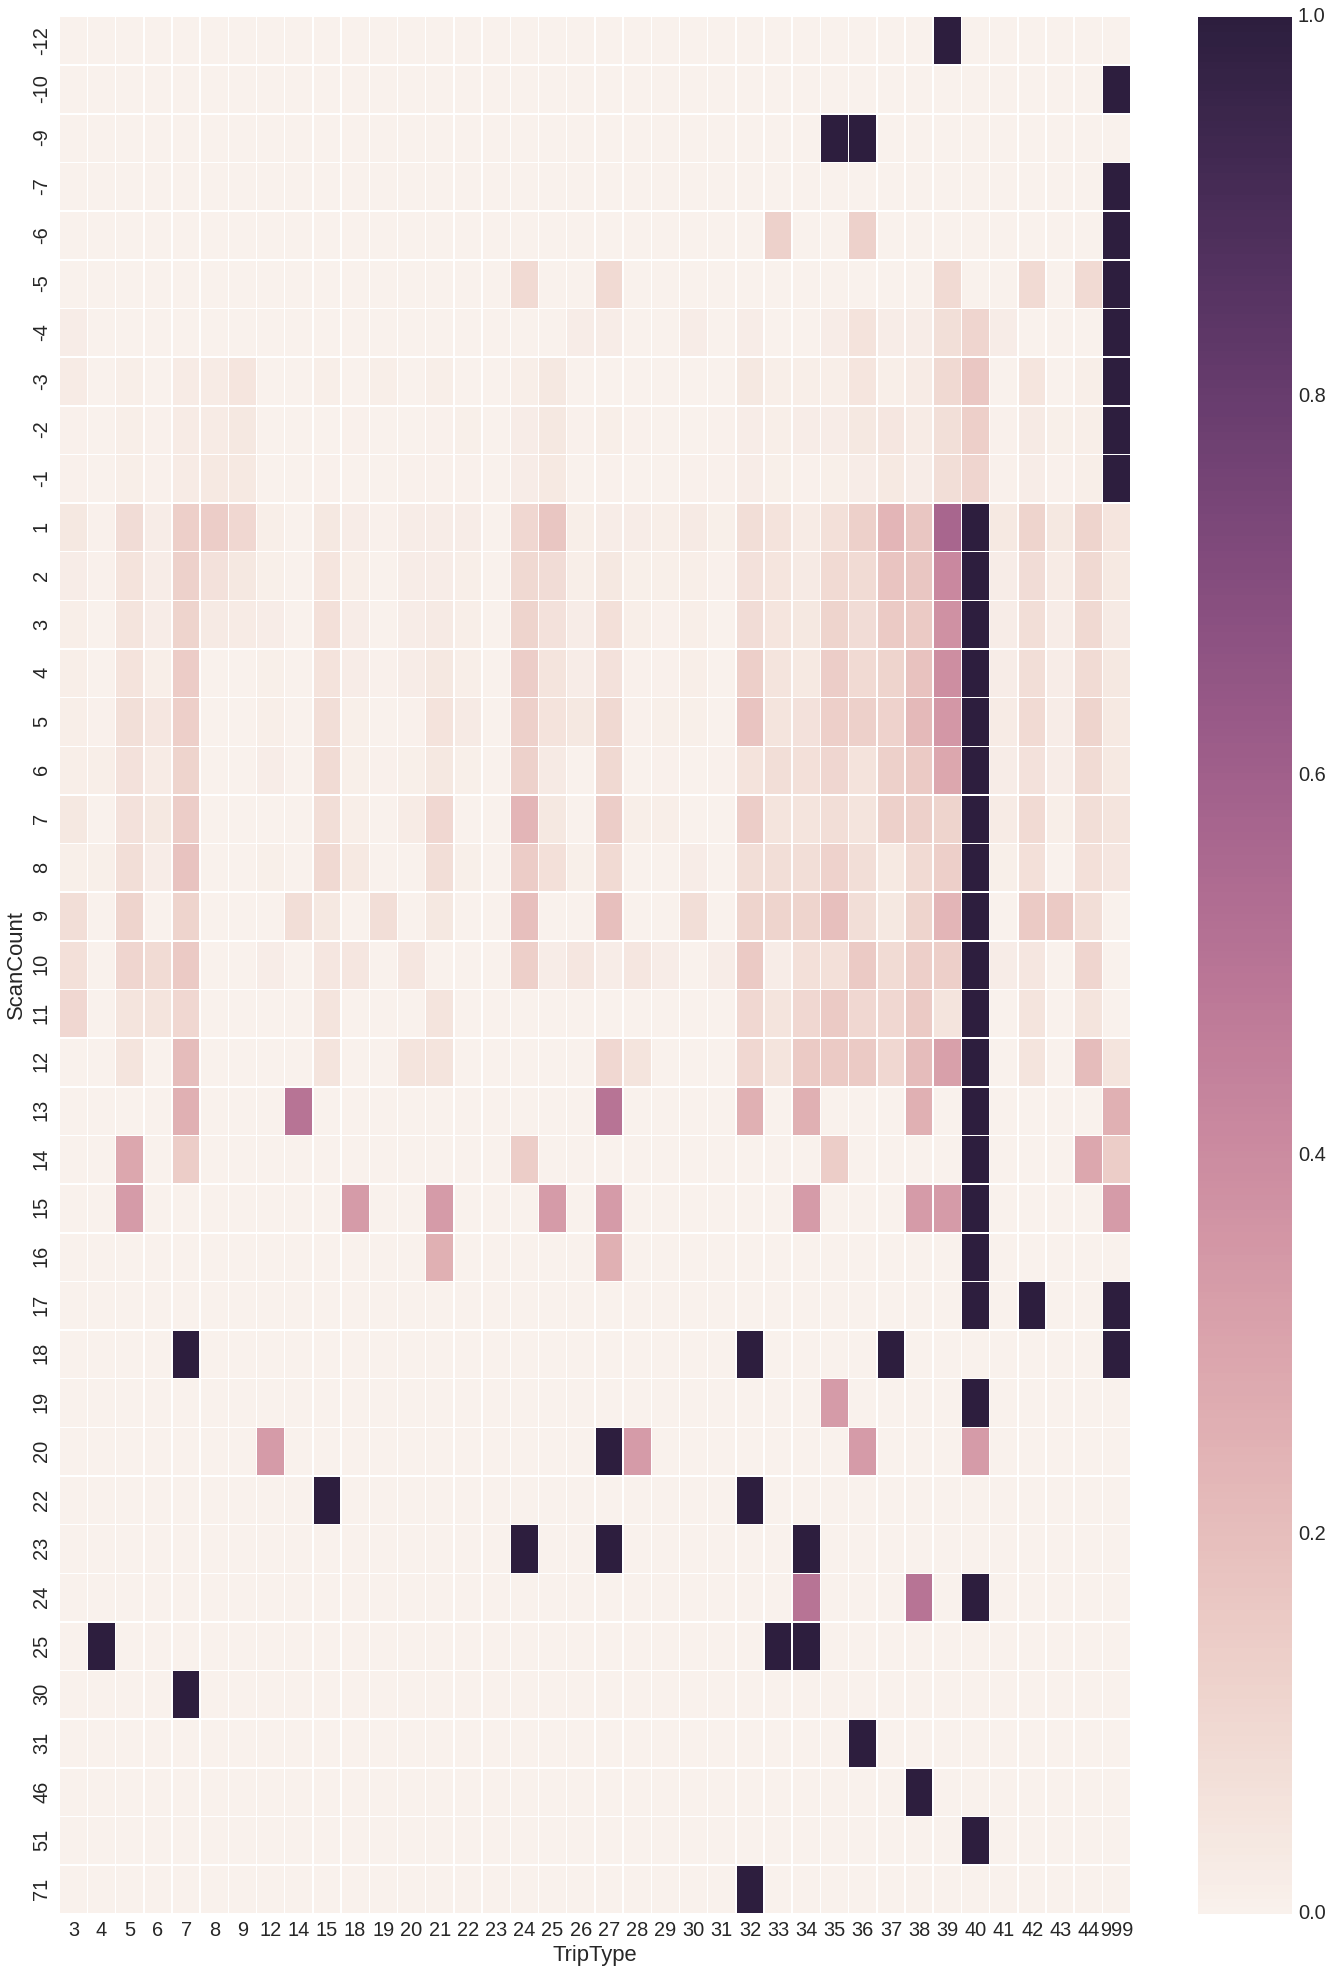

In [40]:
plt.figure(figsize=(24,34))
sns.set(font_scale=2)
sns.heatmap(trip_byscancount, linewidth=0.2)

In above graph we can see how ScanCount is distributed among different triptypes, for ex. we can conclude that most of the returns(negative scancount's) belongs to triptype 999(other).

### Departments with WeekDays

In [61]:
dept_indays = data[['DepartmentDescription','ScanCount', 'Weekday']]
dept_indays.head()

,DepartmentDescription,ScanCount,Weekday
0,FINANCIAL SERVICES,-1,Friday
1,SHOES,1,Friday
2,PERSONAL CARE,1,Friday
3,PAINT AND ACCESSORIES,2,Friday
4,PAINT AND ACCESSORIES,2,Friday


### For purchased products

In [62]:
#count frequency of dept in days by purchased(positive scan count)
purchased = dept_indays[dept_indays.ScanCount > -1]
dept_dayscount_purchased = pd.crosstab(purchased['DepartmentDescription'], purchased['Weekday'])
#dept_dayscount_purchased 

In [63]:
dept_dayscount_purchased = dept_dayscount_purchased.div(dept_dayscount_purchased.max(axis=1), axis=0)

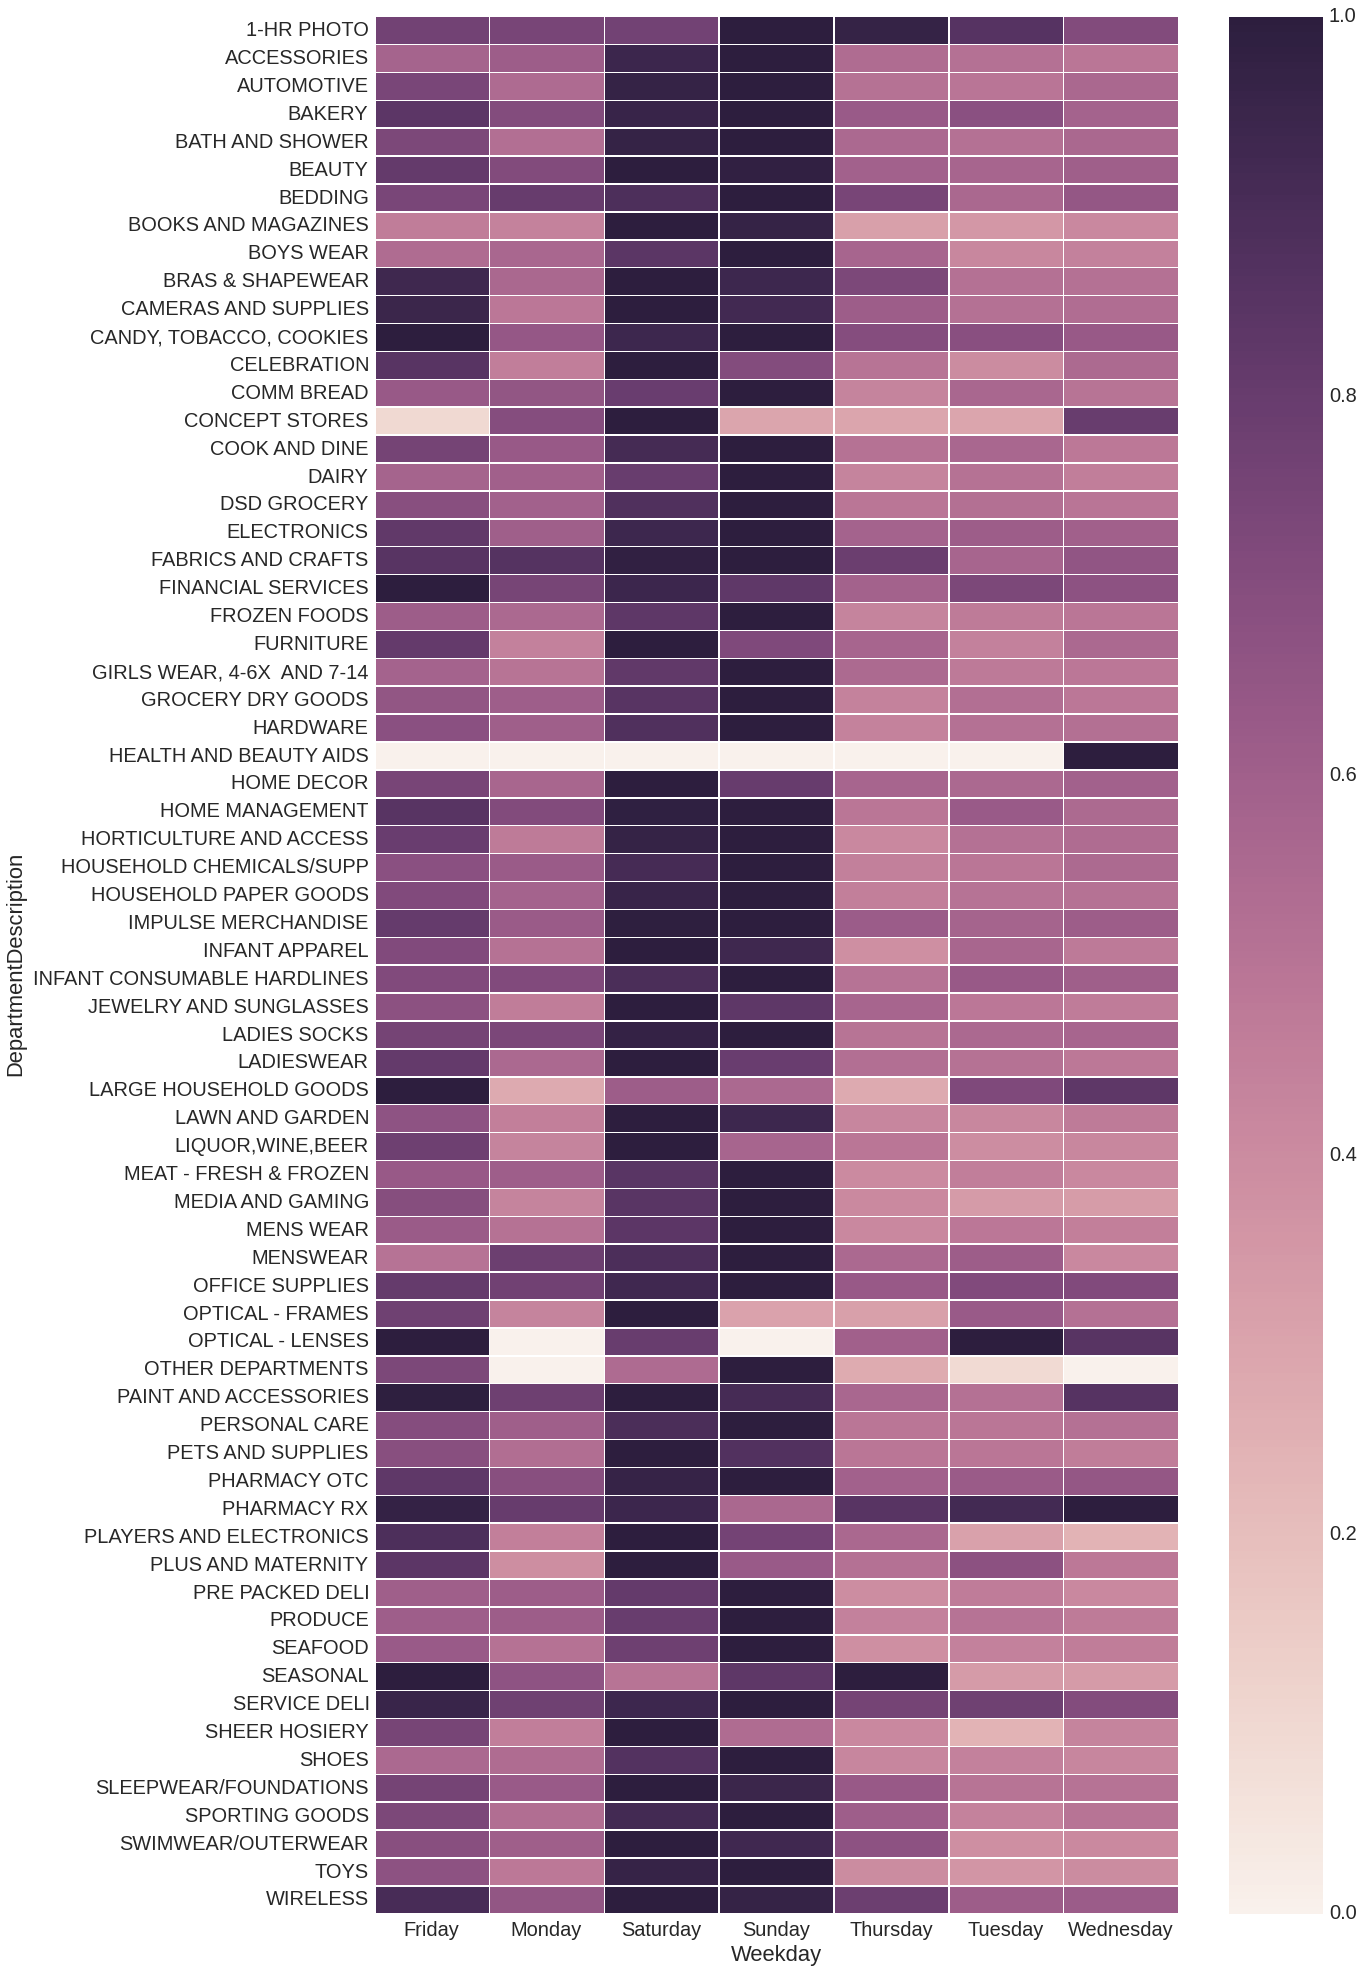

In [64]:
#plot heatmap
plt.figure(figsize=(18,34))
sns.set(font_scale=2)
sns.heatmap(dept_dayscount_purchased, linewidth=0.2)

Above graph shows on what day department products were purchased most.

### For returned products

In [74]:
#count frequency of dept in days by purchased(positive scan count)
returned = dept_indays[dept_indays.ScanCount < 0]
dept_dayscount_returned = pd.crosstab(returned['DepartmentDescription'], returned['Weekday'])
#dept_dayscount_returned 

In [66]:
dept_dayscount_returned = dept_dayscount_returned.div(dept_dayscount_returned.max(axis=1), axis=0)

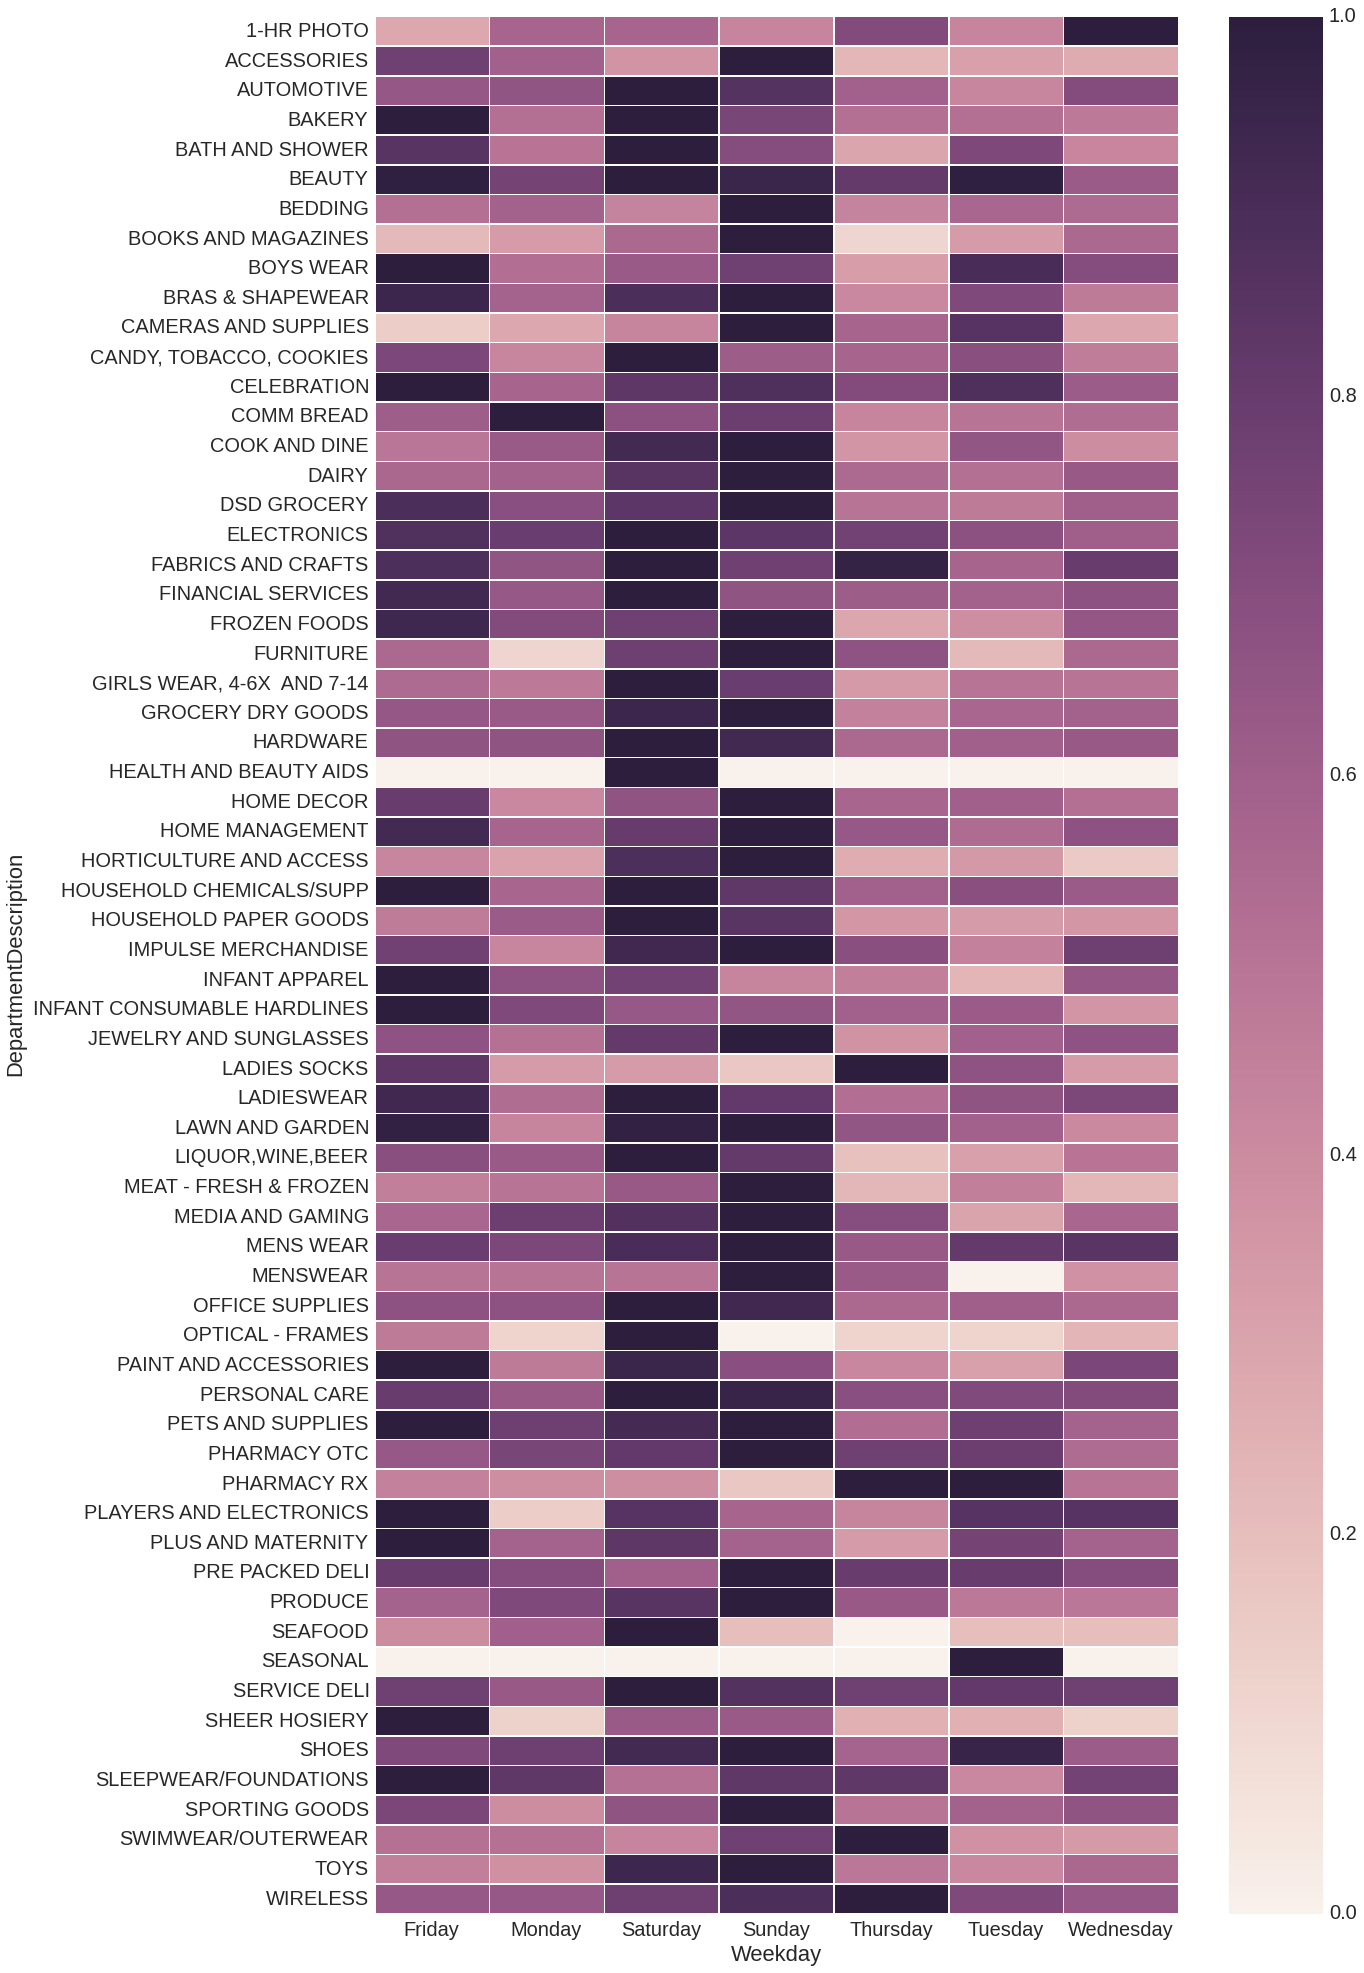

In [67]:
#plot heatmap
plt.figure(figsize=(18,34))
sns.set(font_scale=2)
sns.heatmap(dept_dayscount_returned, linewidth=0.2)

Above graph shows on what day department products were returned most.

## ScanCount with weekday

In [68]:
#check in which days products were returned
scancount_byday = data[['ScanCount', 'Weekday']]
scancount_byday.head()

,ScanCount,Weekday
0,-1,Friday
1,1,Friday
2,1,Friday
3,2,Friday
4,2,Friday


In [75]:
returned = scancount_byday[scancount_byday.ScanCount < 0]
returned_count = pd.crosstab(returned['ScanCount'], returned['Weekday'])
#returned_count

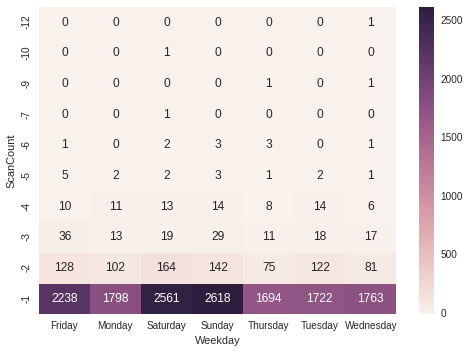

In [73]:
sns.set(font_scale=1)
sns.heatmap(returned_count, annot=True, fmt='d')

Above graph shows on what days products were returned most.